In [71]:
import xarray as xr
from pcv.process import detrend_seasons, aggregate_seasons, select_data
import matplotlib.pylab as plt
import cartopy.crs as ccrs


In [6]:

t2m_path = "/data/compoundx/ERA5/MohitBudapestProject/t2m.monthly.era5.nhemisphere.1981-2020.nc"
t2m_data = xr.open_dataset(t2m_path)

lai_path = "/data/compoundx/lai_global/GLOBMAP_LAI.monthly.nhemisphere.1982-2020.nc"
lai_data = xr.open_dataset(lai_path)


In [7]:
aggregated_t2m = aggregate_seasons(t2m_data)
aggregated_lai = aggregate_seasons(lai_data)


In [8]:
detrended_t2m = detrend_seasons(aggregated_t2m, deg=1)
detrended_lai = detrend_seasons(aggregated_lai, deg=1)


Function detrend_seasons Took 1.9199 seconds


/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/xarray/core/nputils.py:222: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/xarray/core/nputils.py:222: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/xarray/core/nputils.py:222: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])


Function detrend_seasons Took 8.6019 seconds


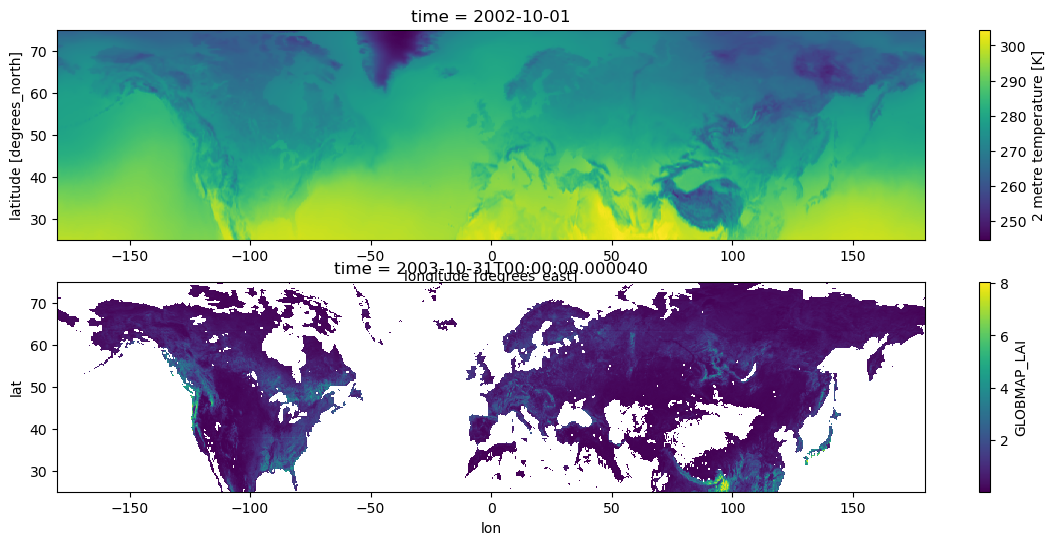

In [26]:
fig, ax = plt.subplots(2,1, figsize=(14,6))

time = 261
t2m_data["t2m"][time,:,:].plot(ax=ax[0])
lai_data["GLOBMAP_LAI"][:,:,time].plot(ax=ax[1])


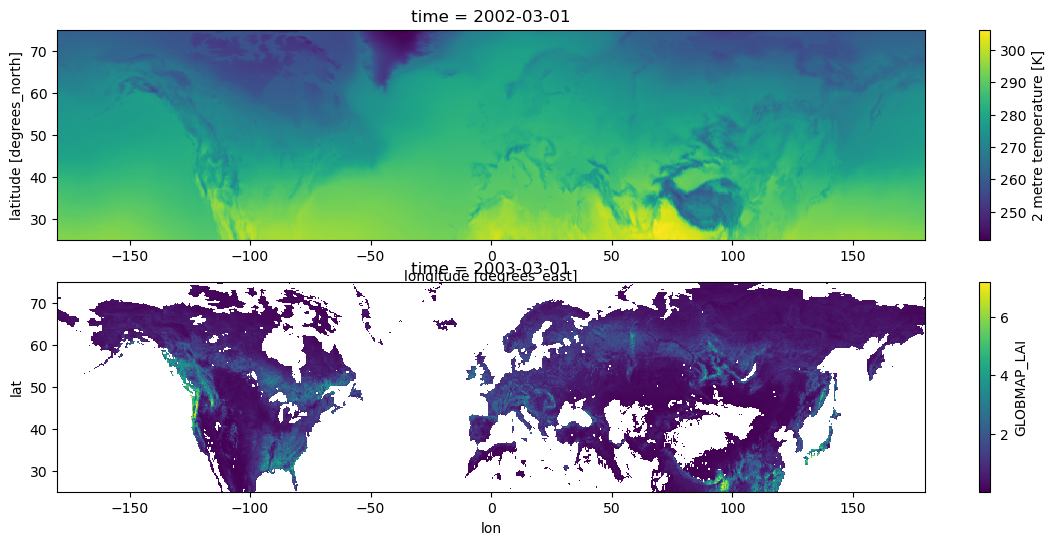

In [33]:
fig, ax = plt.subplots(2,1, figsize=(14,6))

time = 85

aggregated_t2m["t2m"][time,:,:].plot(ax=ax[0])
aggregated_lai["GLOBMAP_LAI"][time,:,:].plot(ax=ax[1])

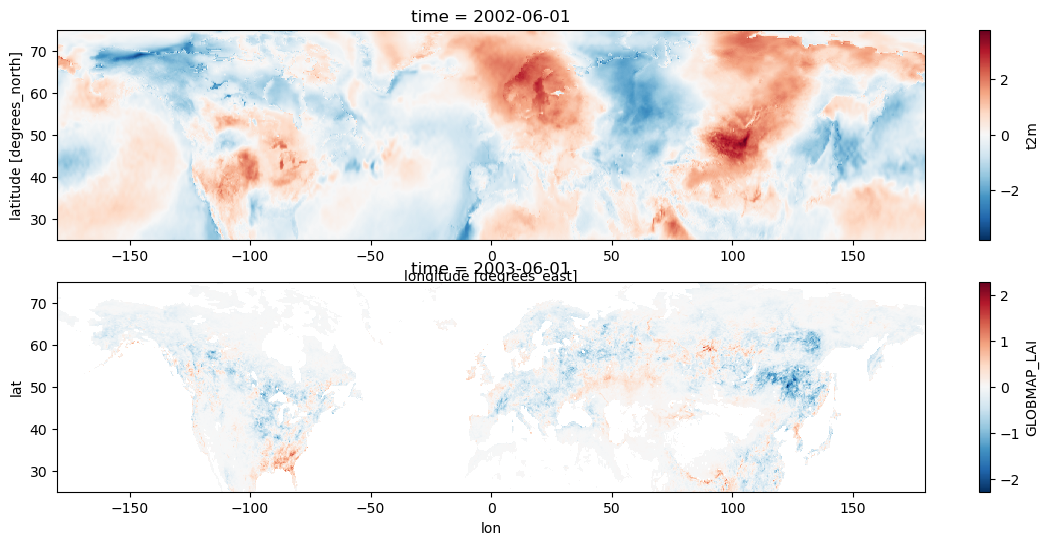

In [35]:
fig, ax = plt.subplots(2,1, figsize=(14,6))

time = 86

detrended_t2m["t2m"][time,:,:].plot(ax=ax[0])
detrended_lai["GLOBMAP_LAI"][time,:,:].plot(ax=ax[1])

In [48]:
# detrended_lai = detrended_lai.rename({"lat":"latitude", "lon":"longitude"})
# detrended_lai = detrended_lai.reindex(lat = list(reversed(lai_data.latitude)))
lai_winter = select_data(detrended_lai,  "winter")
lai_spring = select_data(detrended_lai,  "spring")
lai_summer = select_data(detrended_lai,  "summer")
t = lai_summer.quantile(0.1, dim="time")

/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


In [51]:
xtreme = "low"
if xtreme=="low":
    t = lai_summer.quantile(0.1, dim="time")
    lai_summer_bin = xr.where(lai_summer<t, 1, 0)
elif xtreme == "high":
    t = lai_summer.quantile(0.9, dim="time")
    lai_summer_bin = xr.where(lai_summer>t, 1, 0)

/home/anand/.conda/envs/PCV310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


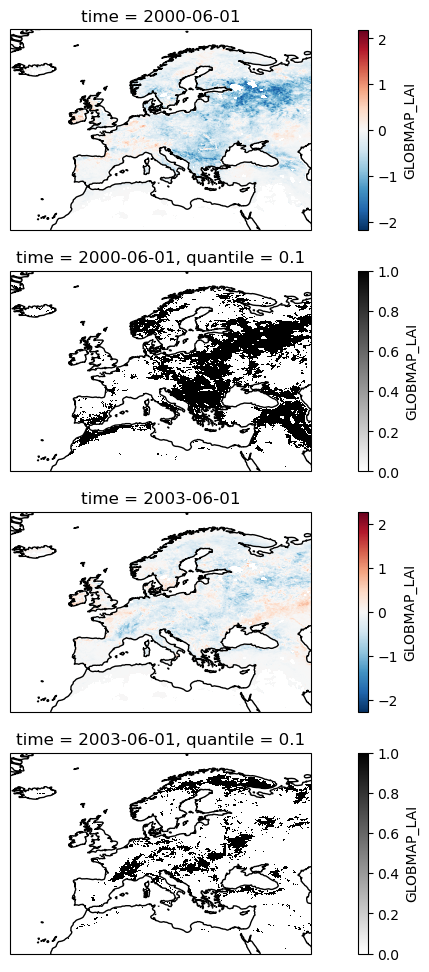

In [78]:
fig, ax = plt.subplots(4,1, figsize=(12,12),subplot_kw={'projection': ccrs.PlateCarree()})
time = 17

ax[0].set_extent((-25, 50, 25, 75), crs=ccrs.PlateCarree())
ax[1].set_extent((-25, 50, 25, 75), crs=ccrs.PlateCarree())
ax[2].set_extent((-25, 50, 25, 75), crs=ccrs.PlateCarree())
ax[3].set_extent((-25, 50, 25, 75), crs=ccrs.PlateCarree())

ax[0].coastlines()
ax[1].coastlines()
ax[2].coastlines()
ax[3].coastlines()

lai_summer[time,:,:].plot(ax=ax[0])
lai_summer_bin[time,:,:].plot(ax=ax[1], cmap="gray_r")
lai_summer[time+3,:,:].plot(ax=ax[2])
lai_summer_bin[time+3,:,:].plot(ax=ax[3], cmap="gray_r")
